In [1]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Dataset

data = pd.read_csv(r"C:\Users\91893\Downloads\Credit Card Fraud Detection .csv")

In [3]:
data

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
...,...,...,...,...,...
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000


# Extracting Some Basic Details About the Dataset

In [21]:
#1. To Check the First Five Rows of the Dataset

data.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [22]:
#2. To Check the Last Five Rows of the Dataset

data.tail()

,credit_card,city,state,zipcode,credit_card_limit
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000
983,1409322756311484,Houston,PA,15342,15000


In [23]:
#3. To Check the Shape of the Dataset (Rows,Columns)

data.shape

(984, 5)

In [24]:
#4. To Check the Total Size of the Dataset

data.size

4920

In [25]:
#5. To Check the Columns Present in the Dataset

data.columns

Index(['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit'], dtype='object')

In [26]:
#6. To Check the Data Type of Each Column

data.dtypes

credit_card           int64
city                 object
state                object
zipcode               int64
credit_card_limit     int64
dtype: object

In [27]:
#7. To Check the Index, Columns, Data Type, and Memory at Once

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


# Data Cleaning

In [28]:
data[data.duplicated()] #To check whether if any duplicate values exist in the dataset or not 

,credit_card,city,state,zipcode,credit_card_limit


In [29]:
#As we see there exist no duplicate values in the dataset, so we can proceed further to extract more insights

# Performing EDA on the Given Dataset

## 1. Credit Card Limit Distribution 

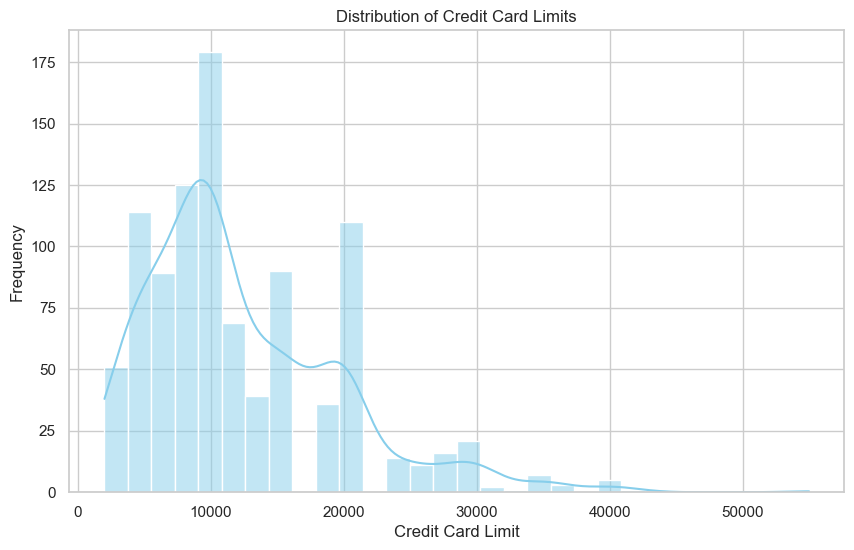

In [31]:
#Plotting the Credit Card Limit Distribution through Histogram by Using KDE (Kernel Density Estimate)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.histplot(data['credit_card_limit'], kde=True, bins=30, color="skyblue")
ax.set_title("Distribution of Credit Card Limits")
ax.set_xlabel("Credit Card Limit")
ax.set_ylabel("Frequency")
plt.show()

## 2. Location Patterns

In [15]:
#Finding the Location Patterns of Average Credit Card Limits (Across 15 Cities)

location_credit_limit = data.groupby(['city', 'state', 'zipcode'])['credit_card_limit'].mean().reset_index()

#Sorting the data to find out the top 15 cities with highest average credit card limits

highest_credit_limit = location_credit_limit.sort_values(by = 'credit_card_limit', ascending = False).head(15)

highest_credit_limit

,city,state,zipcode,credit_card_limit
75,Monticello,ME,4760,42000.0
112,Tampa,FL,33601,30000.0
38,Fort Wayne,IN,46801,30000.0
58,Knoxville,PA,16928,25000.0
23,Cleveland,NY,13042,25000.0
3,Amarillo,TX,79101,24000.0
92,Raleigh,WV,25911,22500.0
81,Oakland,RI,2858,22500.0
43,Garfield,NJ,7026,21000.0
17,Cedar Rapids,IA,52401,20000.0


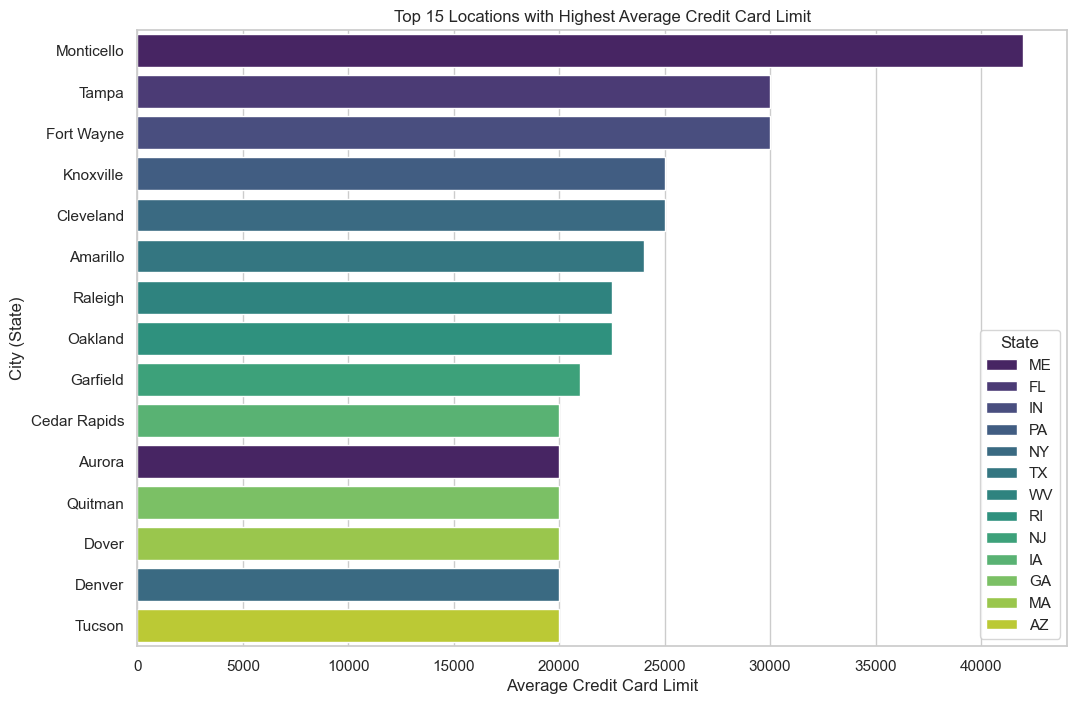

In [32]:
#Plotting the Bar Chart of Top 15 Locations with Highest Credit Card Limit

plt.figure(figsize = (12,8))
ax = sns.barplot(y='city', x='credit_card_limit', data=highest_credit_limit, hue='state', dodge=False, palette="viridis")
ax.set_title('Top 15 Locations with Highest Average Credit Card Limit')
ax.set_xlabel('Average Credit Card Limit')
ax.set_ylabel('City (State)')
plt.legend(title = 'State')
plt.show()

## 3. Credit Limit Ranges Across Regions

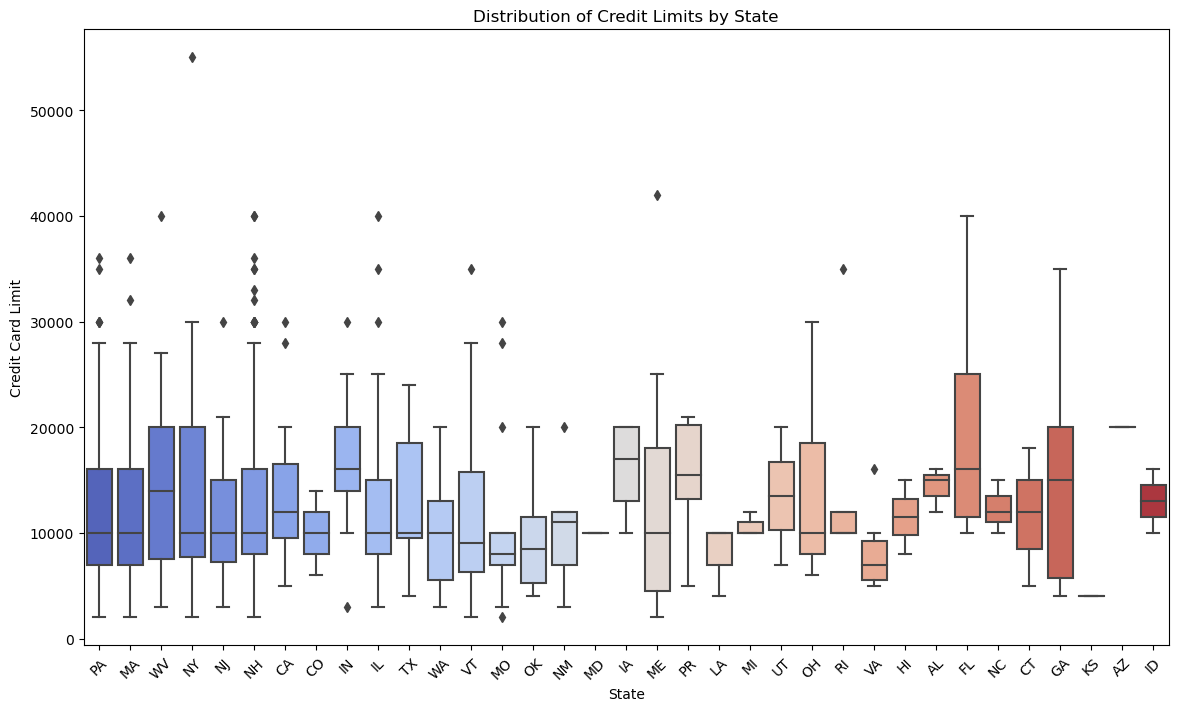

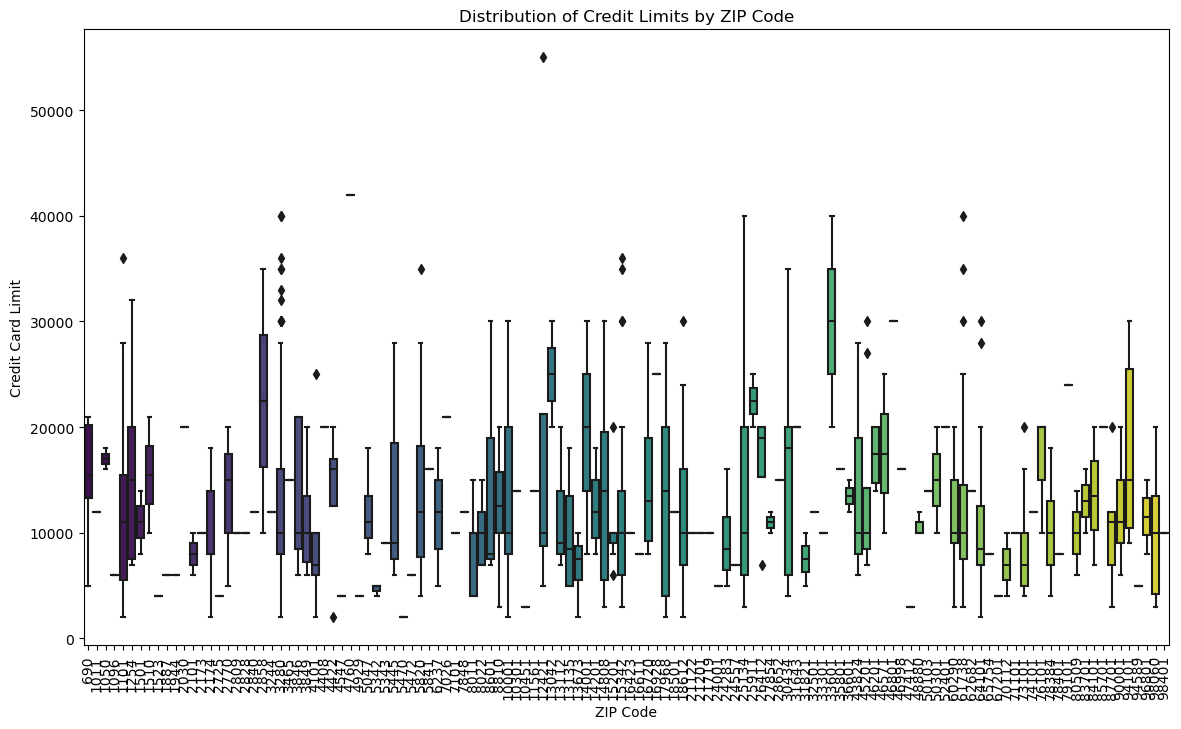

In [6]:
# 3. Using Box Plots to Display the Credit Limits by State and ZIP Code

#State

plt.figure(figsize=(14, 8))
sns.boxplot(x='state', y='credit_card_limit', data=data, palette="coolwarm")
plt.title("Distribution of Credit Limits by State")
plt.xlabel("State")
plt.ylabel("Credit Card Limit")
plt.xticks(rotation=45)
plt.show()


#ZIP Code

plt.figure(figsize=(14, 8))
sns.boxplot(x='zipcode', y='credit_card_limit', data=data, palette='viridis')
plt.title('Distribution of Credit Limits by ZIP Code')
plt.ylabel('Credit Card Limit')
plt.xlabel('ZIP Code')
plt.xticks(rotation=90)
plt.show()

## 4. ZIP Code Specific Patterns 

In [34]:
#To Calculate the Average Credit Card Limit of Each ZIP Code

zip_code_credit_limit = data.groupby(['zipcode'])['credit_card_limit'].mean().reset_index()

#To Sort Out the Top 15 ZIP Code with Highest Credit Card Average Limit

highest_credit_card_average_limit = zip_code_credit_limit.sort_values(by = 'credit_card_limit', ascending = False).head(15)

highest_credit_card_average_limit

,zipcode,credit_card_limit
30,4760,42000.0
92,46801,30000.0
85,33601,30000.0
53,13042,25000.0
65,16928,25000.0
112,79101,24000.0
20,2858,22500.0
76,25911,22500.0
41,7026,21000.0
116,85701,20000.0


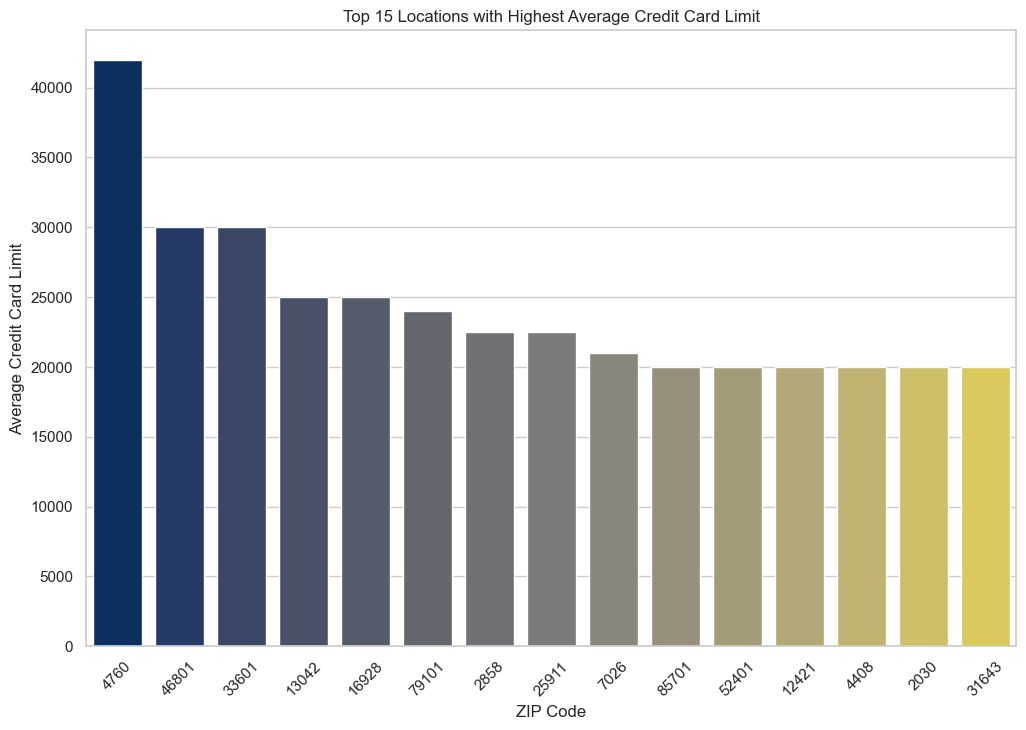

In [40]:
plt.figure(figsize = (12,8))
ax = sns.barplot(y='credit_card_limit', x='zipcode', data=highest_credit_card_average_limit, palette="cividis", order=highest_credit_card_average_limit['zipcode'])
ax.set_title('Top 15 Locations with Highest Average Credit Card Limit')
ax.set_xlabel('ZIP Code')
ax.set_ylabel('Average Credit Card Limit')
plt.xticks(rotation = 45)
plt.show()

## 5. Repeat ZIP Code Analysis 

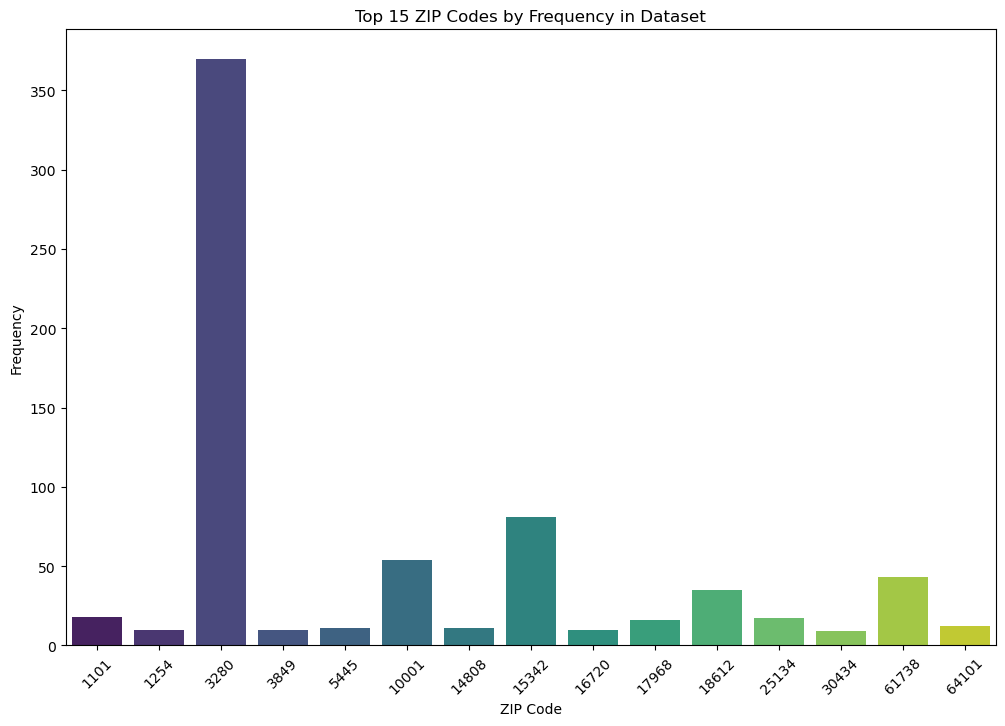

In [4]:
#To Plot the ZIP Codes Frequency by Using Bar Plot

zip_code_frequency = data['zipcode'].value_counts().reset_index()
zip_code_frequency.columns = ['zipcode', 'frequency']

# Displaying the top 15 ZIP codes by frequency
top_zip_code_frequency = zip_code_frequency.head(15)

# Plotting the top 15 ZIP codes by frequency
plt.figure(figsize=(12, 8))
sns.barplot(x='zipcode', y='frequency', data=top_zip_code_frequency, palette="viridis")
plt.title("Top 15 ZIP Codes by Frequency in Dataset")
plt.xlabel("ZIP Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## 6. City-State Pair Credit Card Frequency

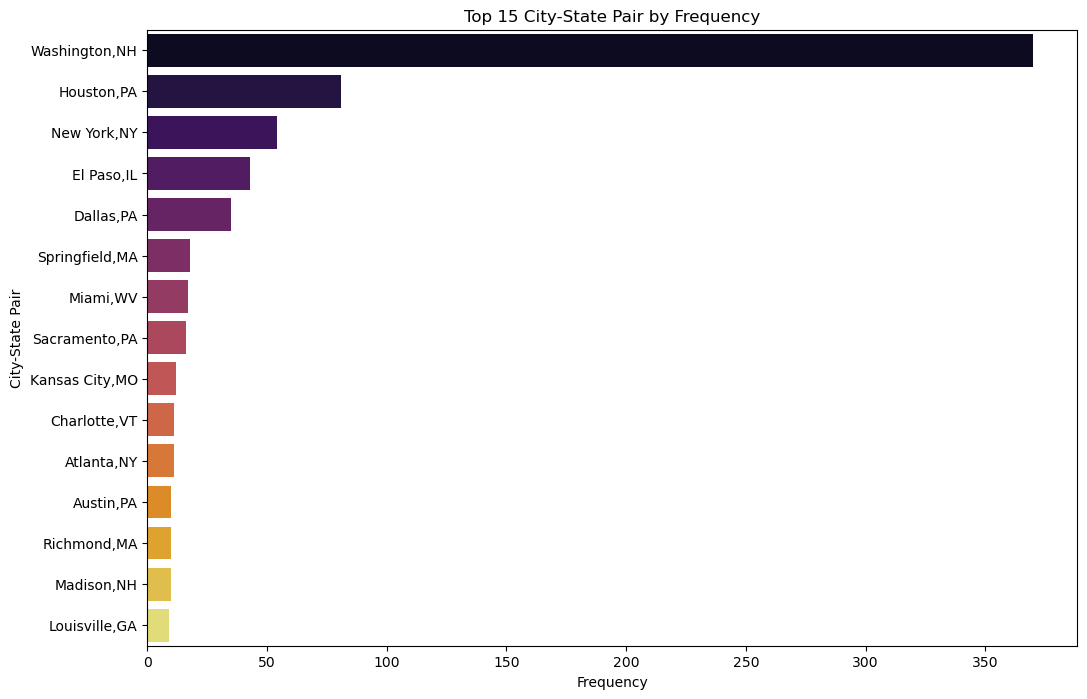

In [6]:
#To Create a Column to Combine City and State for Analysis
data['city_state'] = data.city + ',' + data.state

# To count the frequency of each city-state pair
city_state_frequency = data.city_state.value_counts().reset_index()
city_state_frequency.columns = ['city_state','frequency']

#To display the top 15 city-state frequency
top_city_state_frequency = city_state_frequency.head(15)
top_city_state_frequency

#To Plot the Bar Chart to Display Top 15 City-State Frequency

plt.figure(figsize=(12,8))
sns.barplot(y = 'city_state', x = 'frequency', data = top_city_state_frequency, palette = 'inferno')
plt.xlabel('Frequency')
plt.ylabel('City-State Pair')
plt.title('Top 15 City-State Pair by Frequency')
plt.show()


## 7. Credit Card Outliers Analysis 

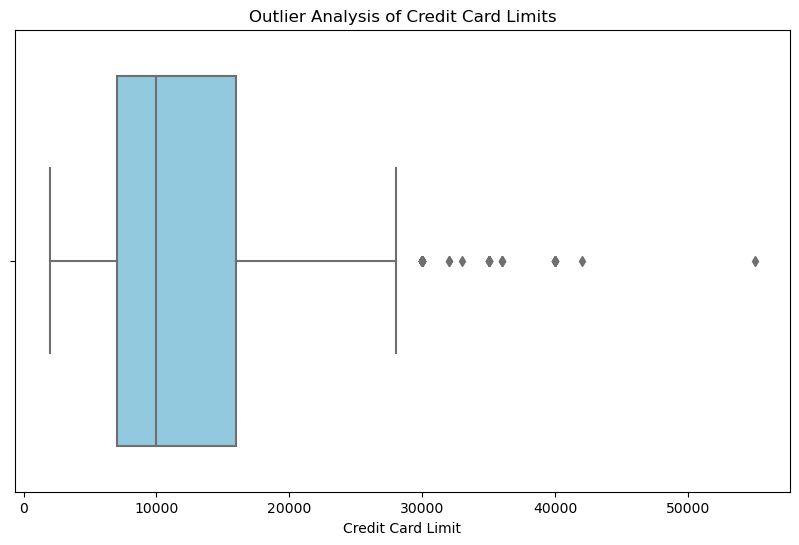

In [23]:
# To Display All the Outliers by Using Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_card_limit', data=data, color='skyblue')
plt.title("Outlier Analysis of Credit Card Limits")
plt.xlabel("Credit Card Limit")

# Displaying the plot
plt.show()


## 8. Customer Behaviour by Credit Limit

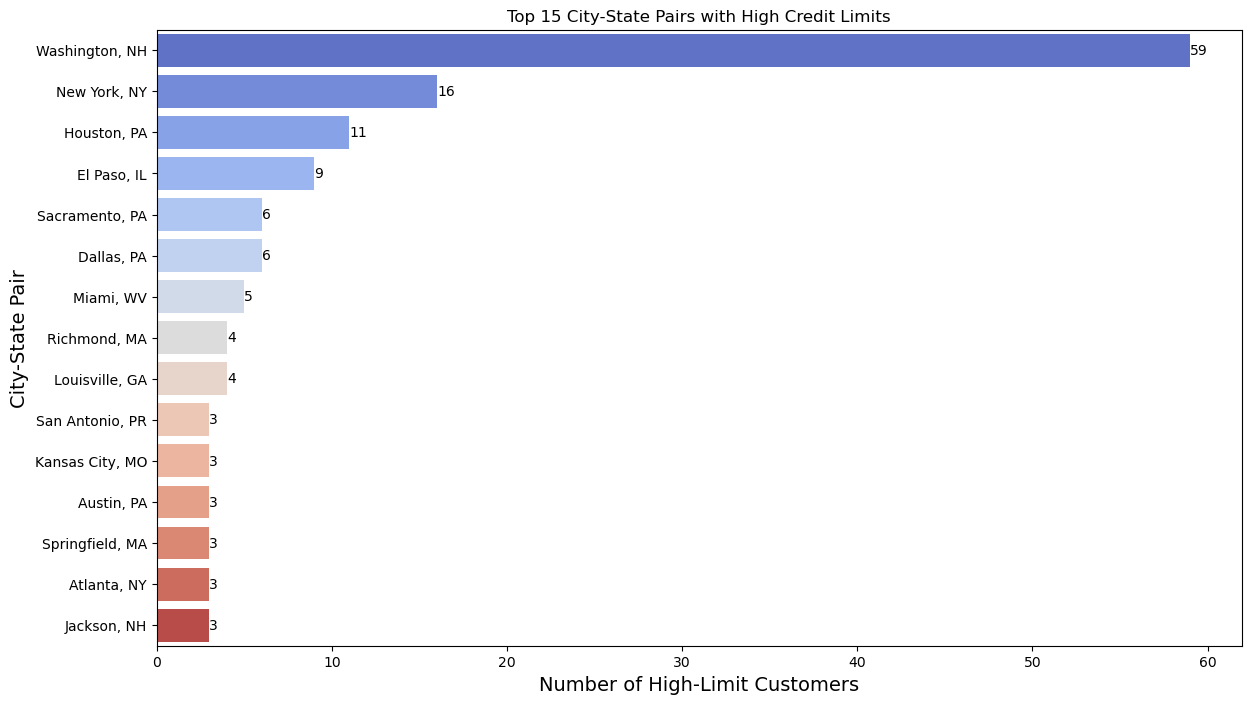

In [34]:
# To Define a High Credit Limit as Those in the Top 10%
high_limit_threshold = data['credit_card_limit'].quantile(0.90)  # Top 10% threshold
data['high_credit'] = data['credit_card_limit'] >= high_limit_threshold

# To Count the Number of High-Limit Customers by State and City
high_limit_counts = data[data['high_credit']].groupby('city_state').size().reset_index(name='high_limit_count')

# To Sort Out the Top Locations with the Most High-Limit Customers
top_high_limit_locations = high_limit_counts.sort_values(by='high_limit_count', ascending=False).head(15)

# To Visualize the Top 15 City-State Pairs with High-Credit Limits
plt.figure(figsize=(14, 8))
sns.barplot(y='city_state', x='high_limit_count', data=top_high_limit_locations, palette="coolwarm")
plt.title("Top 15 City-State Pairs with High Credit Limits")
plt.xlabel("Number of High-Limit Customers", fontsize=14)
plt.ylabel("City-State Pair", fontsize=14)

# Adding data labels for each bar
for index, value in enumerate(top_high_limit_locations['high_limit_count']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.show()

## 9. Correlation Between Credit Limits and Location 

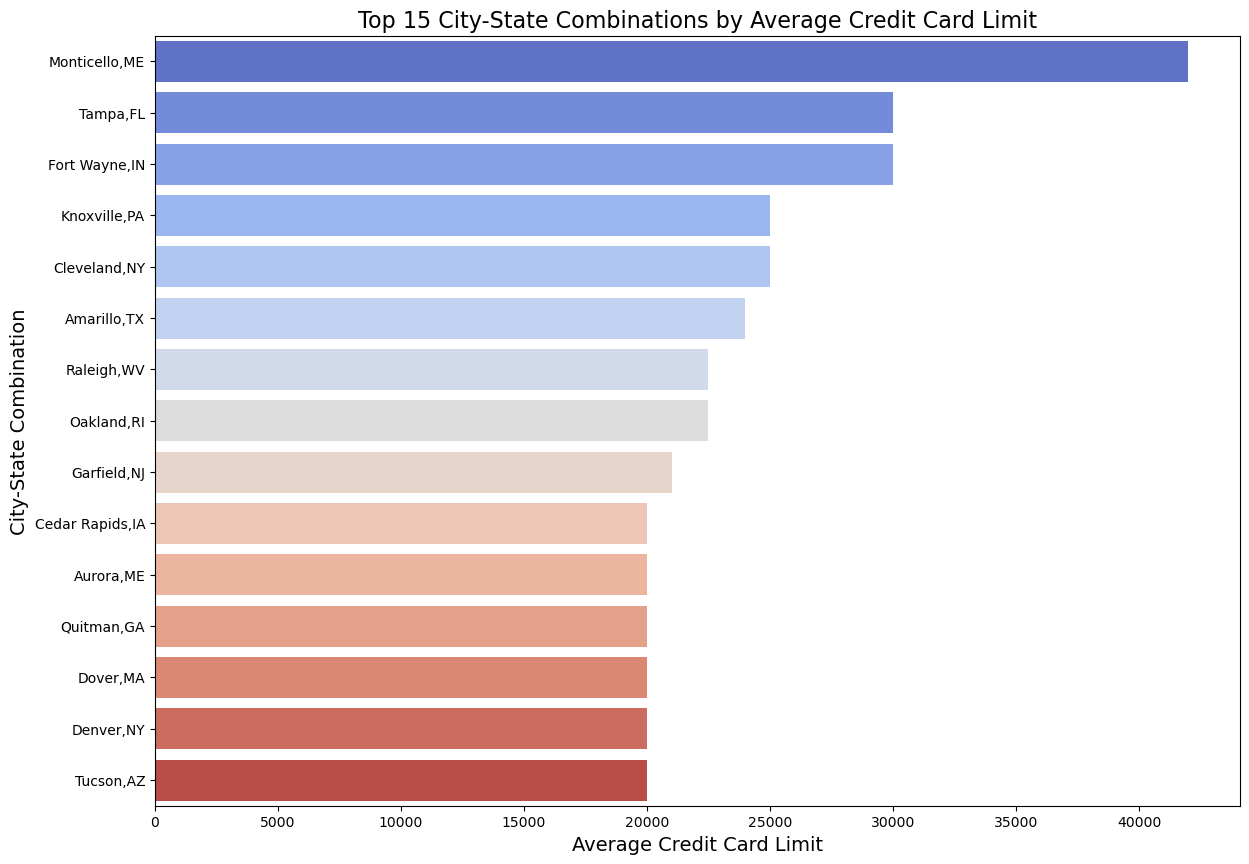

In [8]:
# To Calculate the Average Credit Limit for Each City-State Combination
location_credit_limit = data.groupby('city_state')['credit_card_limit'].mean().reset_index()

# To sort by average credit limit to identify high and low limit locations
location_credit_limit = location_credit_limit.sort_values(by='credit_card_limit', ascending=False)

# To Plot the Top 15 City-State Combinations by Average Credit Limit
plt.figure(figsize=(14, 10))
sns.barplot(x='credit_card_limit', y='city_state', data=location_credit_limit.head(15), order=location_credit_limit.head(15)['city_state'], palette="coolwarm")
plt.title("Top 15 City-State Combinations by Average Credit Card Limit", fontsize=16)
plt.xlabel("Average Credit Card Limit", fontsize=14)
plt.ylabel("City-State Combination", fontsize=14)
plt.show()